In [48]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import glob
import os
import glob




def loadFile(name):
    data=pd.read_csv(name,sep="\t")
    data["H"]=np.round(data["B_extx (T)"]*10000/(np.sqrt(2)/2))
    data["m_full"]=(data["m_fullx (A/m)"]+data["m_fully (A/m)"])/np.sqrt(2)
    data["m"]=data["m_full"]/np.max(np.abs(data["m_full"]))
    data["hIsland_my"]=data["m_full.region1y (A/m)"]/np.max(np.sqrt(data["m_full.region1y (A/m)"]**2+data["m_full.region1x (A/m)"]**2))

    

    data=data.drop(columns=["# t (s)",\
    "mz ()","mx ()", "my ()",\
    "B_extx (T)", "B_exty (T)","B_extz (T)",\
    "m_fullz (A/m)","m_fullx (A/m)","m_fully (A/m)",\
    "m_full.region1x (A/m)","m_full.region1y (A/m)","m_full.region1z (A/m)",\
    "m_full.region2x (A/m)","m_full.region2y (A/m)","m_full.region2z (A/m)"])

    data.attrs["Hc"]=np.average(np.abs(data[np.sign(data["m"]).diff() != 0]["H"].iloc[1:]))
    data.attrs["Br"]=np.average(np.abs(data[np.sign(data["H"]).diff() != 0]["m"].iloc[1:]))


    return data

def arrayToColors(data):

    data=(data-np.min(data))/(np.max(data)-np.min(data))
    return mpl.cm.plasma(np.array(data))

def getData():
    data=[]
    
    files=glob.glob("data/*")
    badFiles=[]

    for name in files:
        pointiness,temp=name.split("spacing")
        spacing,length=temp.split("length")
        pointiness=float(pointiness[15:-1])
        spacing=float(spacing[:-1])
        length=float(length[:-4])

        try:
            thisData=loadFile(name+"/table.txt")
            thisData.attrs["pointiness"]=pointiness
        
            thisData.attrs["spacing"]=spacing
            thisData.attrs["length"]=length
            data.append(thisData)
        except Exception as e:
            badFiles.append(name)
            continue


    print(f"Could not load {len(badFiles)}/{len(files)} file")
    return data

data=getData()



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Library/Frameworks/Python.framewor

Could not load 77/462 file


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Library/Frameworks/Python.framewor

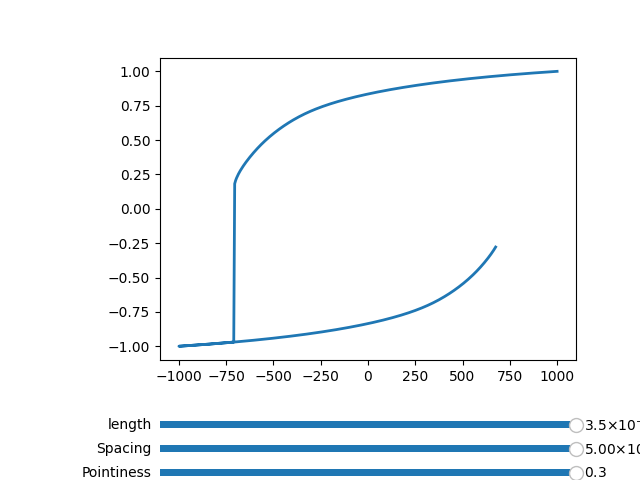

5e-07 0.3 1.519230769230769e-07
4.6399999999999997e-07 0.30000000000000004 1.5e-07
--
5e-07 0.3 1.5721153846153844e-07
4.6399999999999997e-07 0.30000000000000004 1.5e-07
--
5e-07 0.3 1.6346153846153846e-07
4.6399999999999997e-07 0.30000000000000004 1.7e-07
--
5e-07 0.3 1.6442307692307692e-07
4.6399999999999997e-07 0.30000000000000004 1.7e-07
--
5e-07 0.3 1.6057692307692307e-07
4.6399999999999997e-07 0.30000000000000004 1.7e-07
--
5e-07 0.3 1.548076923076923e-07
4.6399999999999997e-07 0.30000000000000004 1.5e-07
--
5e-07 0.3 1.5288461538461536e-07
4.6399999999999997e-07 0.30000000000000004 1.5e-07
--
5e-07 0.3 1.519230769230769e-07
4.6399999999999997e-07 0.30000000000000004 1.5e-07
--
5e-07 0.3 1.514423076923077e-07
4.6399999999999997e-07 0.30000000000000004 1.5e-07
--
5e-07 0.3 1.519230769230769e-07
4.6399999999999997e-07 0.30000000000000004 1.5e-07
--
3.266826923076923e-07 0.3 1.519230769230769e-07
3.2e-07 0.30000000000000004 1.5e-07
--
3.266826923076923e-07 0.0028846153846153882 1.51

In [ ]:
from matplotlib.widgets import Slider
%matplotlib widget

# Define initial parameters
init_spacing = 5
init_pointiness = 3
init_length=2

def getClosestPlot(spacing,pointiness,length):
    minDist=None
    bestRun=None
    for run in data:
        dist=abs(run.attrs["spacing"]-spacing)+abs(run.attrs["pointiness"]-pointiness)+abs(run.attrs["length"]-length)
        if minDist is None or dist<minDist:
            minDist=dist
            bestRun=run
    return bestRun

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
bestData=getClosestPlot(init_spacing,init_pointiness,init_length)
line, = ax.plot(bestData["H"],bestData["m"], lw=2)

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.25)

axspacing = fig.add_axes([0.25, 0.05, 0.65, 0.03])
spacing_slider = Slider(
    ax=axspacing,
    label='Spacing',
    valmin=3.25e-7,
    valmax=5e-7,
    valinit=init_spacing,
)

# Make a vertically oriented slider to control the amplitude
axpointy = fig.add_axes([0.25, 0.0, 0.65, 0.03])
pointy_slider = Slider(
    ax=axpointy,
    label="Pointiness",
    valmin=0,
    valmax=0.3,
    valinit=init_pointiness,
)

axlength = fig.add_axes([0.25, 0.1, 0.65, 0.03])
length_slider = Slider(
    ax=axlength,
    label="length",
    valmin=1.5e-7,
    valmax=3.5e-7,
    valinit=init_length,

)



# The function to be called anytime a slider's value changes
def update(val):
    
    bestData=getClosestPlot(spacing_slider.val,pointy_slider.val,length_slider.val)
    print(spacing_slider.val,pointy_slider.val,length_slider.val)
    print(bestData.attrs["spacing"],bestData.attrs["pointiness"],bestData.attrs["length"])
    print("--")
    actualSpacing=bestData.attrs["spacing"]
    actualPointiness=bestData.attrs["pointiness"]
    actualLength=bestData.attrs["length"]

    line.set_ydata(bestData["m"])
    line.set_xdata(bestData["H"])
    fig.suptitle(f"{actualSpacing}, {actualPointiness}, {actualLength}")
    fig.canvas.draw_idle()

spacing_slider.on_changed(update)
pointy_slider.on_changed(update)
length_slider.on_changed(update)




plt.show()

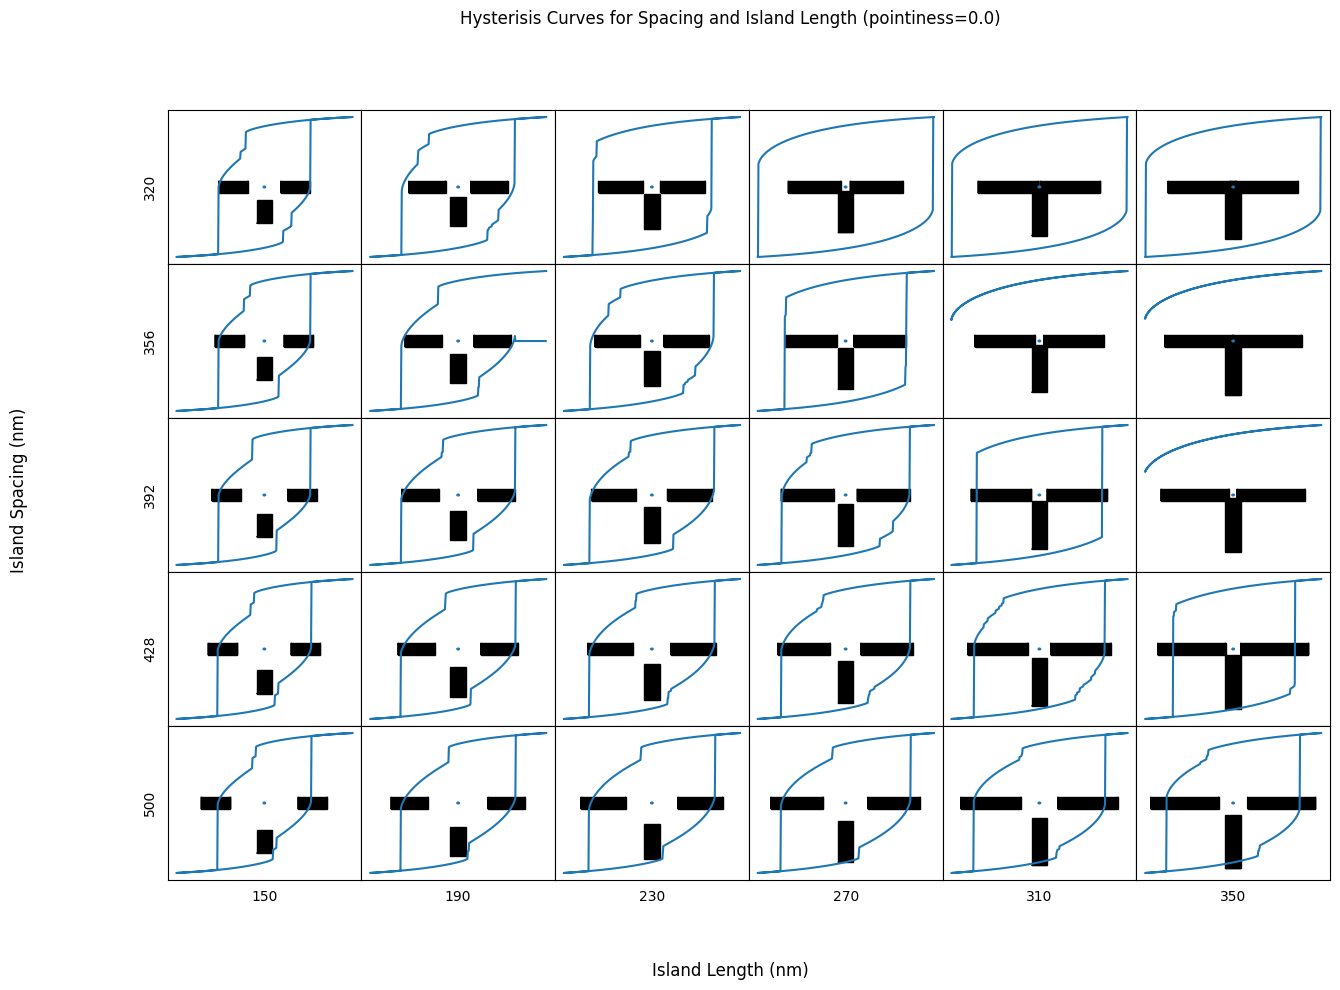

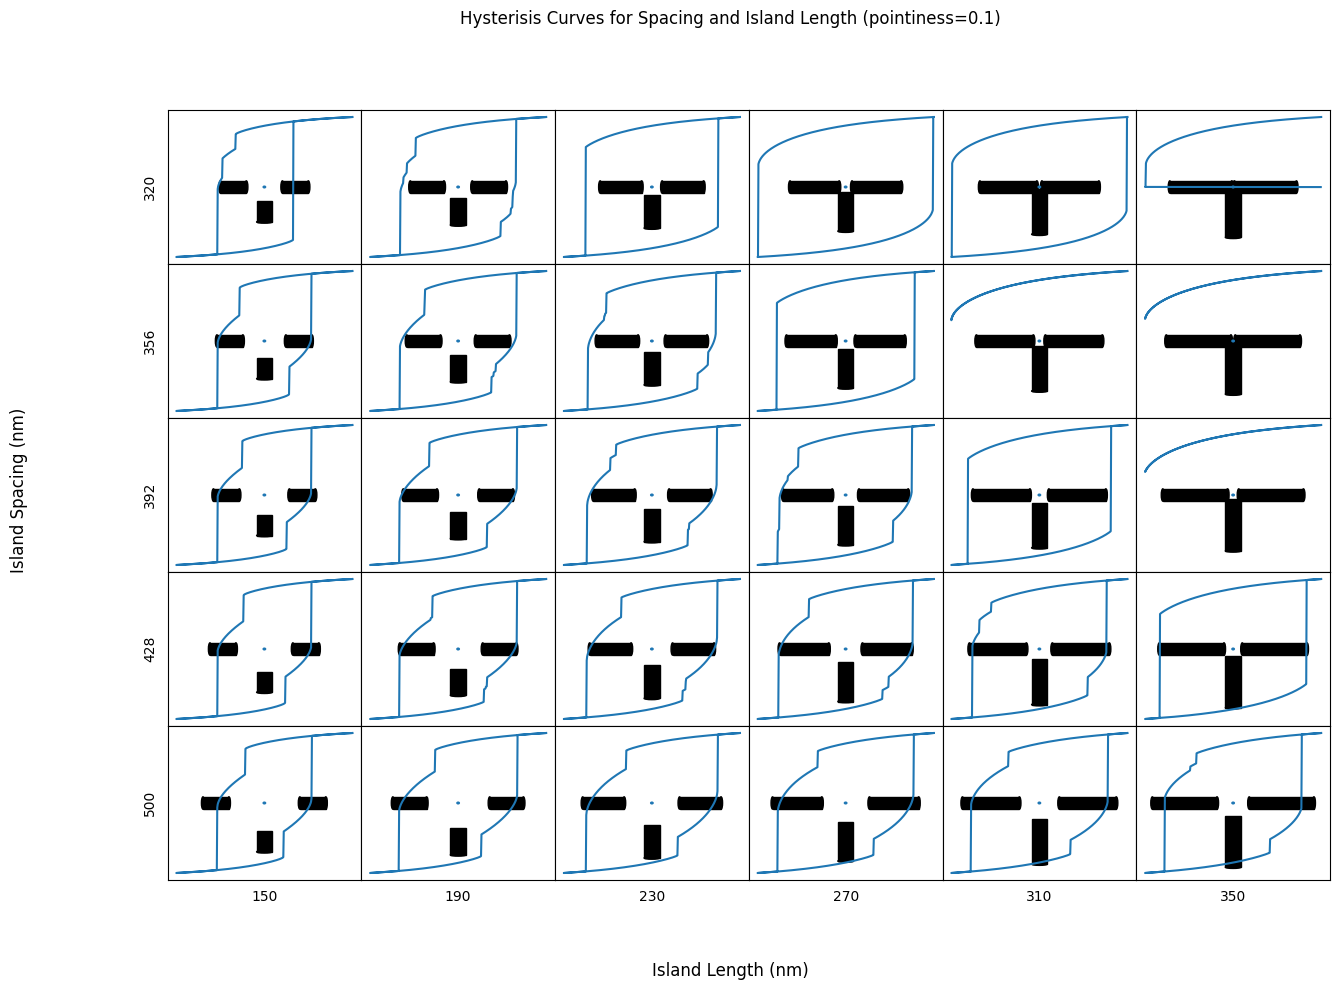

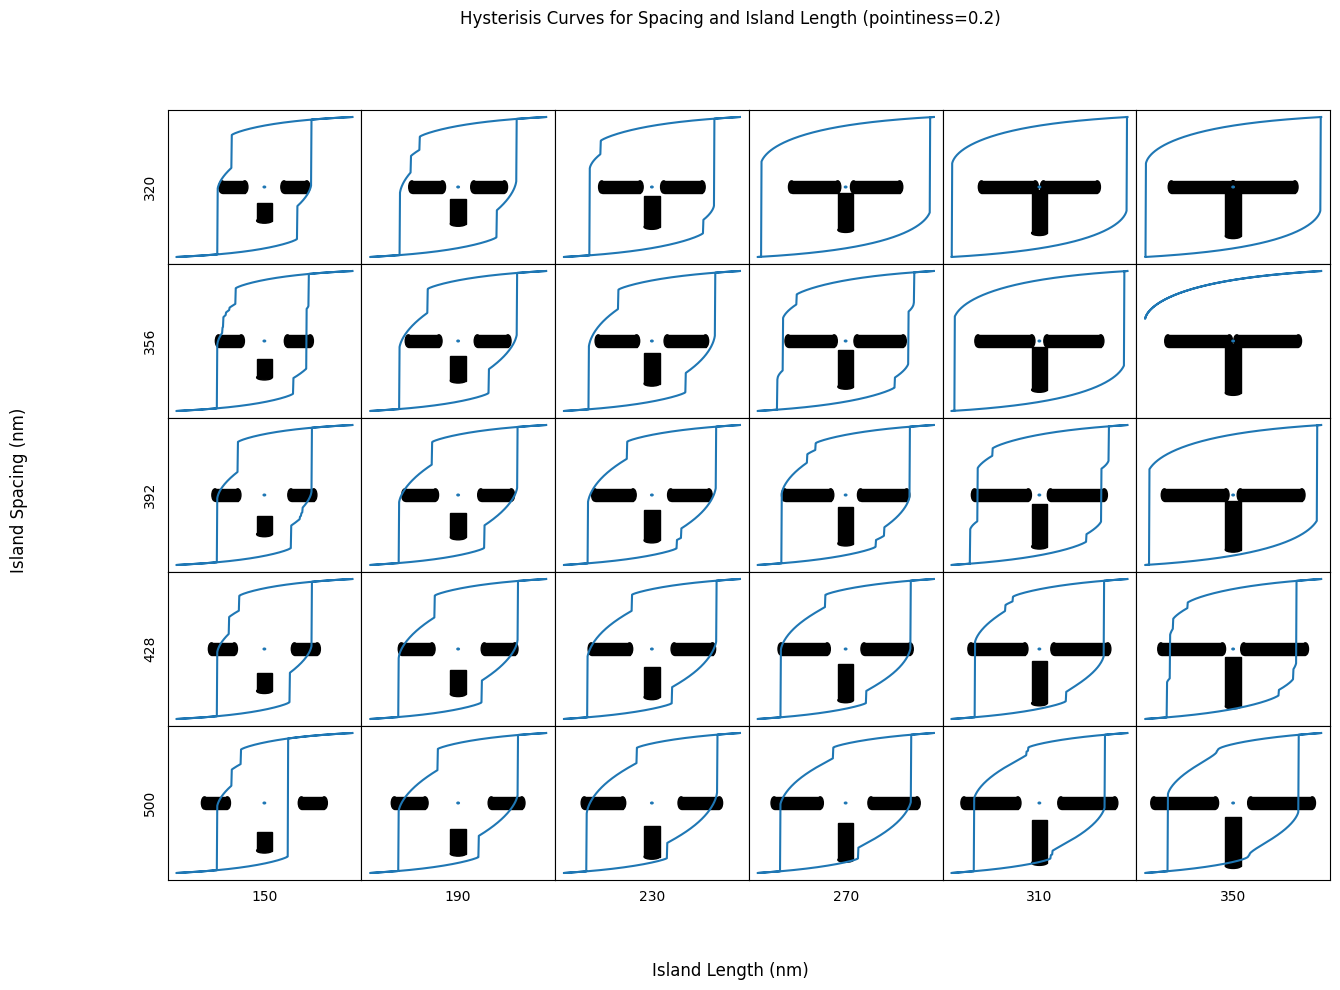

TypeError: 'NoneType' object is not subscriptable

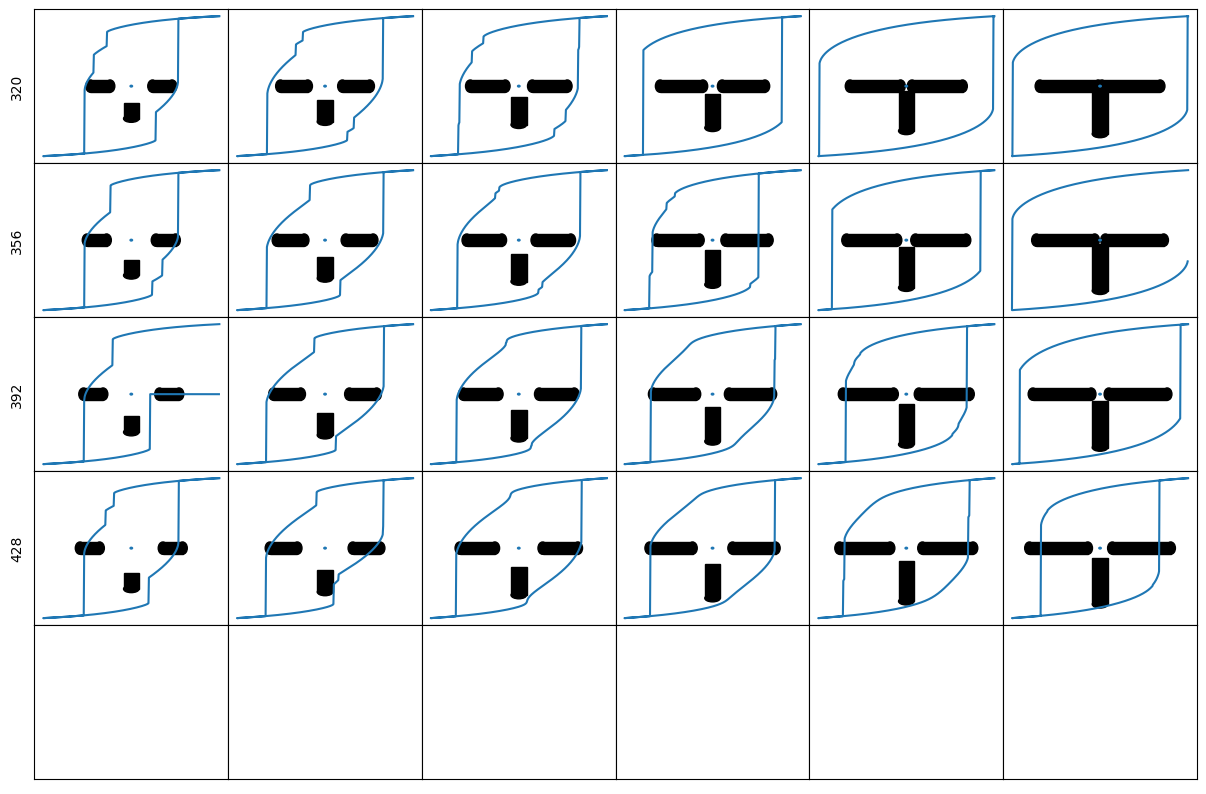

In [224]:
%matplotlib inline



def getDataPointWithVal(pointiness,spacing,length):
    for i in data:
        if i.attrs["pointiness"]==pointiness and i.attrs["spacing"]==spacing and i.attrs["length"]==length:
            return i
    return None

def getPossibleVals(data):
    pointinessVals=[]
    spacingVals=[]
    lengthVals=[]
    for i in data:
        if i.attrs["pointiness"] not in pointinessVals: pointinessVals.append(i.attrs["pointiness"])
        if i.attrs["length"] not in lengthVals: lengthVals.append(i.attrs["length"])
        if i.attrs["spacing"] not in spacingVals: spacingVals.append(i.attrs["spacing"])

    pointinessVals.sort()
    spacingVals.sort()
    lengthVals.sort()

    return pointinessVals, spacingVals, lengthVals

pointinessVals, spacingVals, lengthVals = getPossibleVals(data)
pointinessVals=pointinessVals
spacingVals=spacingVals[::2]
lengthVals=lengthVals[::2]



def addIslandPatch(x,y,axes,spacing,pontiness,length,width,horizontal=True):
    ellipseRadius=width*pointiness

    
    
    if horizontal:
        axes.add_artist(mpl.patches.Rectangle((x-(length-2*ellipseRadius)/2,y-width/2),length-2*ellipseRadius,width,transform=axes.transAxes,color="k"))
        axes.add_artist(mpl.patches.Ellipse((x-length/2+ellipseRadius,y),ellipseRadius*2,width,transform=axes.transAxes,color="k"))
        axes.add_artist(mpl.patches.Ellipse((x+length/2-ellipseRadius,y),ellipseRadius*2,width,transform=axes.transAxes,color="k"))
    else:
        axes.add_artist(mpl.patches.Rectangle((x-width/2,y-(length-2*ellipseRadius)/2),width,length-2*ellipseRadius,transform=axes.transAxes,color="k"))
        axes.add_artist(mpl.patches.Ellipse((x,y-length/2+ellipseRadius),width,ellipseRadius*2,transform=axes.transAxes,color="k"))

def addPreviewPatch(axes,spacing,pointiness,length,scaling=1e-3):
    length*=1e9*scaling
    width=80*scaling
    spacing*=1e9*scaling

    
    addIslandPatch(0.5-spacing/2,0.5,axes,spacing,pointiness,length,width)
    addIslandPatch(0.5+spacing/2,0.5,axes,spacing,pointiness,length,width)
    addIslandPatch(0.5,0.5-spacing/2,axes,spacing,pointiness,length,width,horizontal=False)

    
    
    #axes.add_artist(mpl.patches.Rectangle((0.5-length/2+spacing/2,0.5-width/2),length,width,transform=axes.transAxes,color="k"))
    #axes.add_artist(mpl.patches.Rectangle((0.5-width/2+spacing/2,0.5-width/2),width,length,transform=axes.transAxes,color="k"))
    #print(axes.transAxes)
    axes.add_artist(mpl.patches.Circle((0.5,0.5),0.01,transform=axes.transAxes))

for pointiness in pointinessVals:
    fig,axes=plt.subplots(5,6,sharex=True,sharey=True)
    fig.set_size_inches(15,10)

    plt.subplots_adjust(wspace=0, hspace=0)

    for spacingI,spacing in enumerate(spacingVals[0:]):
        for lengthI,length in enumerate(lengthVals[0:]):
            thisData=getDataPointWithVal(pointiness,spacing,length)

            if spacingI>=len(axes)or lengthI>=len(axes[spacingI]) :
                continue
            thisAxes=axes[spacingI][lengthI]
            thisAxes.plot(thisData["H"],thisData["m"])
            thisAxes.set_xticks([])
            thisAxes.set_yticks([])

            addPreviewPatch(thisAxes,spacing,pointiness,length)

            if(lengthI==0):
                thisAxes.set_ylabel(round(spacing*1e9))
            if(spacingI==len(lengthVals)-2):
                thisAxes.set_xlabel(round(length*1e9))



    fig.supxlabel("Island Length (nm)")
    fig.supylabel("Island Spacing (nm)")
    fig.suptitle(f"Hysterisis Curves for Spacing and Island Length (pointiness={pointiness})")
    plt.show()




